In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('Natural_Gas_Consumption.csv' , parse_dates=['Month Date'])
df

,Month Date,Month,Year,Amount Type,Amount,Customer Type,Customer Count
0,2015-01-01,Jan,2015,Commercial Therms,1519979,Commercial Count,2199
1,2015-01-01,Jan,2015,Interdepartmental Therms,71951,Interdepartmental Count,111
2,2015-01-01,Jan,2015,Other Public Authority Therms,334879,Other Public Authority Count,111
3,2015-01-01,Jan,2015,Residential Therms,2828117,Residential Count,56595
4,2015-02-01,Feb,2015,Commercial Therms,1400902,Commercial Count,2198
...,...,...,...,...,...,...,...
391,2023-02-01,Feb,2023,Residential Therms,3856600,Residential Count,71139
392,2023-03-01,Mar,2023,Commercial Therms,1728198,Commercial Count,2375
393,2023-03-01,Mar,2023,Interdepartmental Therms,103339,Interdepartmental Count,113
394,2023-03-01,Mar,2023,Other Public Authority Therms,375949,Other Public Authority Count,114


In [13]:
df.tail()

,Month Date,Month,Year,Amount Type,Amount,Customer Type,Customer Count
391,2023-02-01,Feb,2023,Residential Therms,3856600,Residential Count,71139
392,2023-03-01,Mar,2023,Commercial Therms,1728198,Commercial Count,2375
393,2023-03-01,Mar,2023,Interdepartmental Therms,103339,Interdepartmental Count,113
394,2023-03-01,Mar,2023,Other Public Authority Therms,375949,Other Public Authority Count,114
395,2023-03-01,Mar,2023,Residential Therms,2818154,Residential Count,71379


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month Date      396 non-null    datetime64[ns]
 1   Month           396 non-null    object        
 2   Year            396 non-null    int64         
 3   Amount Type     396 non-null    object        
 4   Amount          396 non-null    int64         
 5   Customer Type   396 non-null    object        
 6   Customer Count  396 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 21.8+ KB


In [15]:
df.isnull().sum()

Month Date        0
Month             0
Year              0
Amount Type       0
Amount            0
Customer Type     0
Customer Count    0
dtype: int64

In [16]:
df.rename(columns={'Month Date':'Date','Amount Type':'Amount_Type'} , inplace=True)

In [17]:
df.drop(['Month' ,'Customer Type' ,'Customer Count','Year'], axis=1 ,inplace=True)

In [18]:
new_df = df.groupby('Amount_Type')

In [19]:
Commercial_Therms = new_df.get_group('Commercial Therms')
Interdepartmental_Therms = new_df.get_group('Interdepartmental Therms')
Other_Public_Authority_Therms = new_df.get_group('Other Public Authority Therms')
Residential_Therms = new_df.get_group('Residential Therms')



In [20]:
Commercial_Therms

,Date,Amount_Type,Amount
0,2015-01-01,Commercial Therms,1519979
4,2015-02-01,Commercial Therms,1400902
8,2015-03-01,Commercial Therms,1315061
12,2015-04-01,Commercial Therms,1132566
16,2015-05-01,Commercial Therms,1029277
...,...,...,...
376,2022-11-01,Commercial Therms,1193779
380,2022-12-01,Commercial Therms,1503044
384,2023-01-01,Commercial Therms,1642469
388,2023-02-01,Commercial Therms,1815965


In [21]:
import pystan
from prophet import Prophet


In [22]:
Commercial_Therms.rename(columns={'Date':'ds' ,'Amount':'y'} , inplace=True)
Interdepartmental_Therms.rename(columns={'Date':'ds' ,'Amount':'y'} ,inplace=True)
Other_Public_Authority_Therms.rename(columns={'Date':'ds' ,'Amount':'y'} ,inplace=True)
Residential_Therms.rename(columns={'Date':'ds' ,'Amount':'y'} ,inplace=True)

C:\Users\sweth\AppData\Local\Temp\ipykernel_7968\1401291108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Commercial_Therms.rename(columns={'Date':'ds' ,'Amount':'y'} , inplace=True)
C:\Users\sweth\AppData\Local\Temp\ipykernel_7968\1401291108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interdepartmental_Therms.rename(columns={'Date':'ds' ,'Amount':'y'} ,inplace=True)
C:\Users\sweth\AppData\Local\Temp\ipykernel_7968\1401291108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [23]:
Commercial_Therms

,ds,Amount_Type,y
0,2015-01-01,Commercial Therms,1519979
4,2015-02-01,Commercial Therms,1400902
8,2015-03-01,Commercial Therms,1315061
12,2015-04-01,Commercial Therms,1132566
16,2015-05-01,Commercial Therms,1029277
...,...,...,...
376,2022-11-01,Commercial Therms,1193779
380,2022-12-01,Commercial Therms,1503044
384,2023-01-01,Commercial Therms,1642469
388,2023-02-01,Commercial Therms,1815965


In [24]:
Interdepartmental_Therms

,ds,Amount_Type,y
1,2015-01-01,Interdepartmental Therms,71951
5,2015-02-01,Interdepartmental Therms,60689
9,2015-03-01,Interdepartmental Therms,50584
13,2015-04-01,Interdepartmental Therms,49554
17,2015-05-01,Interdepartmental Therms,51769
...,...,...,...
377,2022-11-01,Interdepartmental Therms,24522
381,2022-12-01,Interdepartmental Therms,54329
385,2023-01-01,Interdepartmental Therms,99104
389,2023-02-01,Interdepartmental Therms,100033


In [25]:
Other_Public_Authority_Therms

,ds,Amount_Type,y
2,2015-01-01,Other Public Authority Therms,334879
6,2015-02-01,Other Public Authority Therms,349242
10,2015-03-01,Other Public Authority Therms,270704
14,2015-04-01,Other Public Authority Therms,236276
18,2015-05-01,Other Public Authority Therms,242332
...,...,...,...
378,2022-11-01,Other Public Authority Therms,295571
382,2022-12-01,Other Public Authority Therms,343104
386,2023-01-01,Other Public Authority Therms,373486
390,2023-02-01,Other Public Authority Therms,416811


In [26]:
Residential_Therms

,ds,Amount_Type,y
3,2015-01-01,Residential Therms,2828117
7,2015-02-01,Residential Therms,1778544
11,2015-03-01,Residential Therms,1284697
15,2015-04-01,Residential Therms,945445
19,2015-05-01,Residential Therms,779920
...,...,...,...
379,2022-11-01,Residential Therms,1220695
383,2022-12-01,Residential Therms,2467187
387,2023-01-01,Residential Therms,3443053
391,2023-02-01,Residential Therms,3856600


In [27]:
m = Prophet(interval_width=0.95, yearly_seasonality=True)
model = m.fit(Commercial_Therms)
m1 = Prophet(interval_width=0.95, yearly_seasonality=True)
model1 = m1.fit(Interdepartmental_Therms)
m2 = Prophet(interval_width=0.95, yearly_seasonality=True)
model2 = m2.fit(Other_Public_Authority_Therms)
m3 = Prophet(interval_width=0.95, yearly_seasonality=True)
model3 = m3.fit(Residential_Therms)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\sweth\AppData\Local\Temp\tmpqrsghp8a\3rdhzsot.json
DEBUG:cmdstanpy:input tempfile: C:\Users\sweth\AppData\Local\Temp\tmpqrsghp8a\hziqlzcx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\sweth\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=95577', 'data', 'file=C:\\Users\\sweth\\AppData\\Local\\Temp\\tmpqrsghp8a\\3rdhzsot.json', 'init=C:\\Users\\sweth\\AppData\\Local\\Temp\\tmpqrsghp8a\\hziqlzcx.json', 'output', 'file=C:\\Users\\sweth\\AppData\\Local\\Temp\\tmpqrsghp8a\\prophet_modelbev7ory8\\prophet_model-20230427181129.csv', 'method=optimi

In [28]:
future = m.make_future_dataframe(periods=12,freq='M')
forecast = m.predict(future)
future1 = m1.make_future_dataframe(periods=12,freq='M')
forecast1 = m1.predict(future1)
future2 = m2.make_future_dataframe(periods=12,freq='M')
forecast2 = m2.predict(future2)
future3 = m3.make_future_dataframe(periods=12,freq='M')
forecast3 = m3.predict(future3)


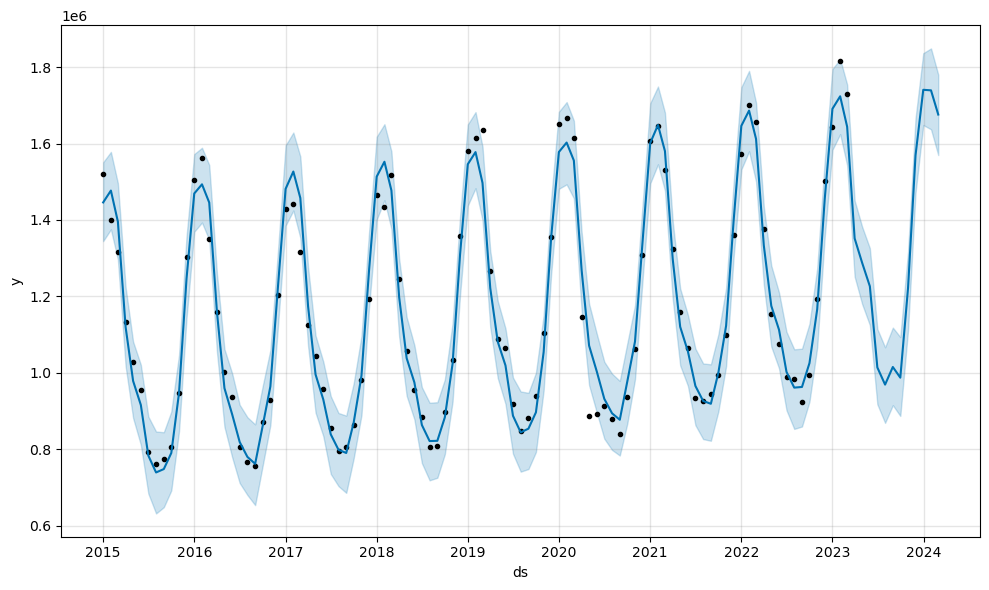

In [29]:

plot1 = m.plot(forecast)


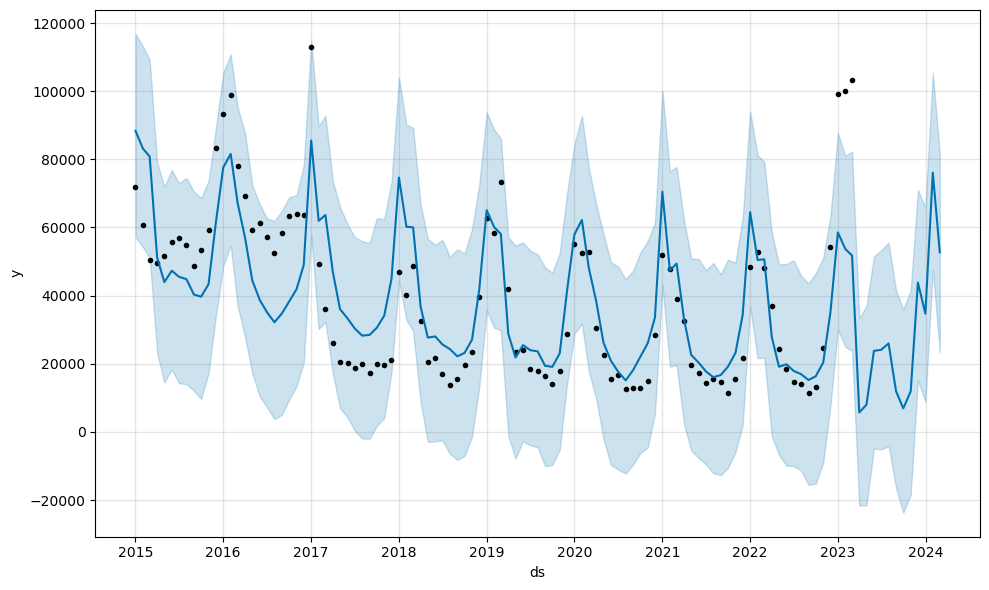

In [30]:
plot2 =m1.plot(forecast1)

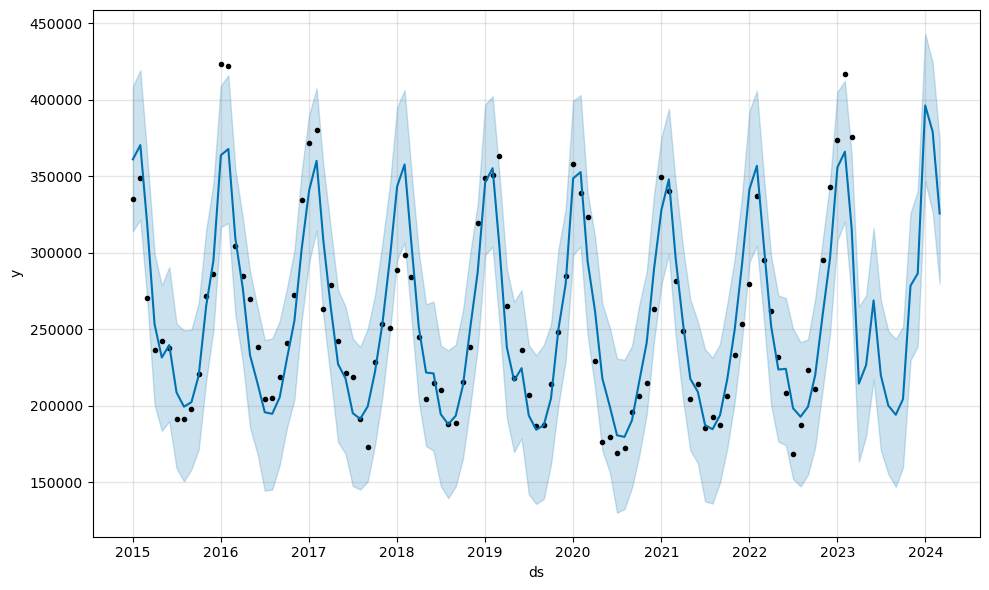

In [31]:
plot3 =m2.plot(forecast2)

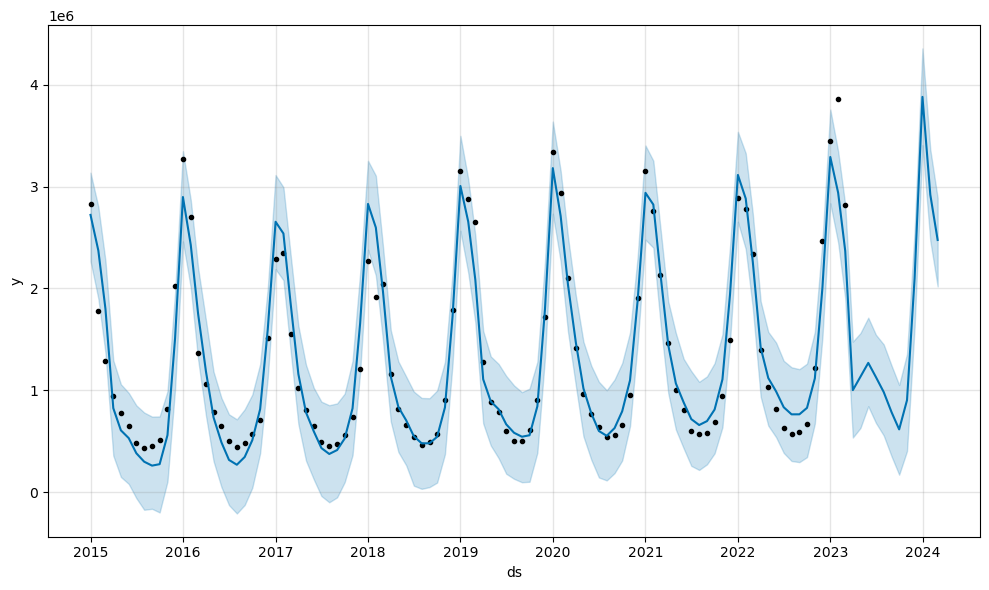

In [32]:
plot4 = m3.plot(forecast3)

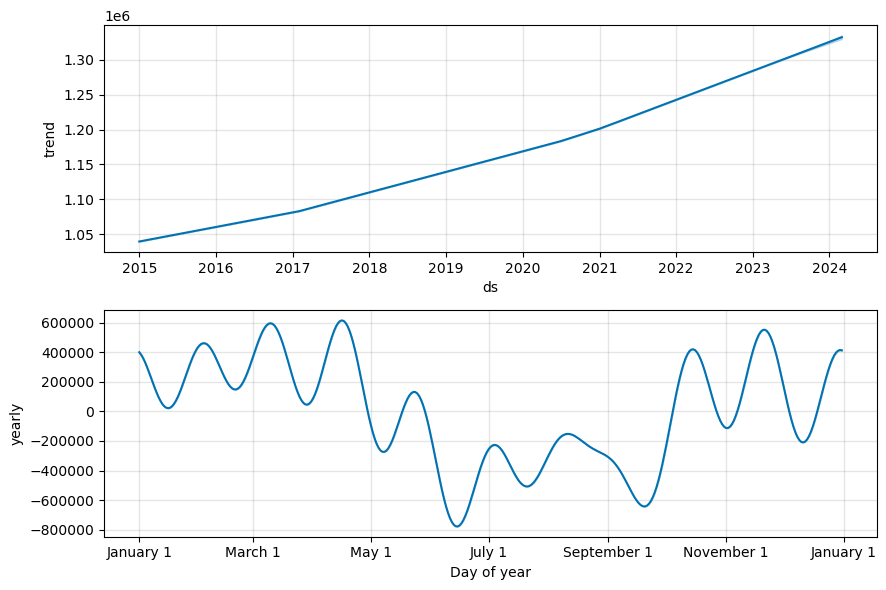

In [33]:
plot4 = m.plot_components(forecast)

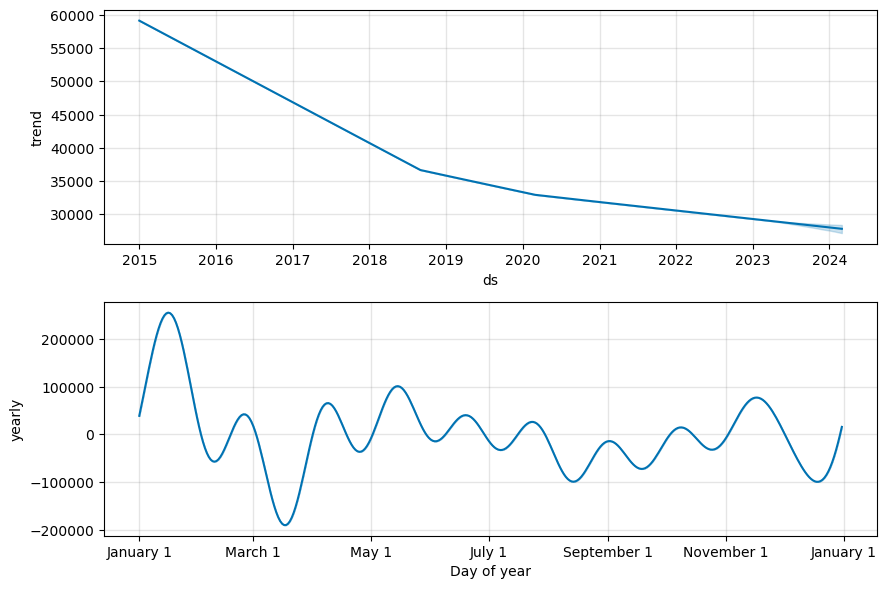

In [34]:
plot5 = m1.plot_components(forecast1)

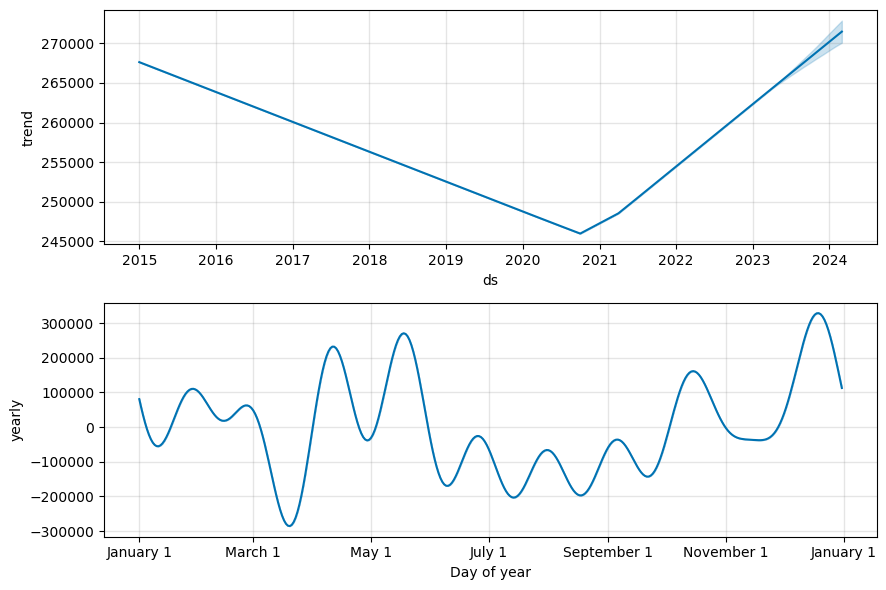

In [35]:
plot6 = m2.plot_components(forecast2)

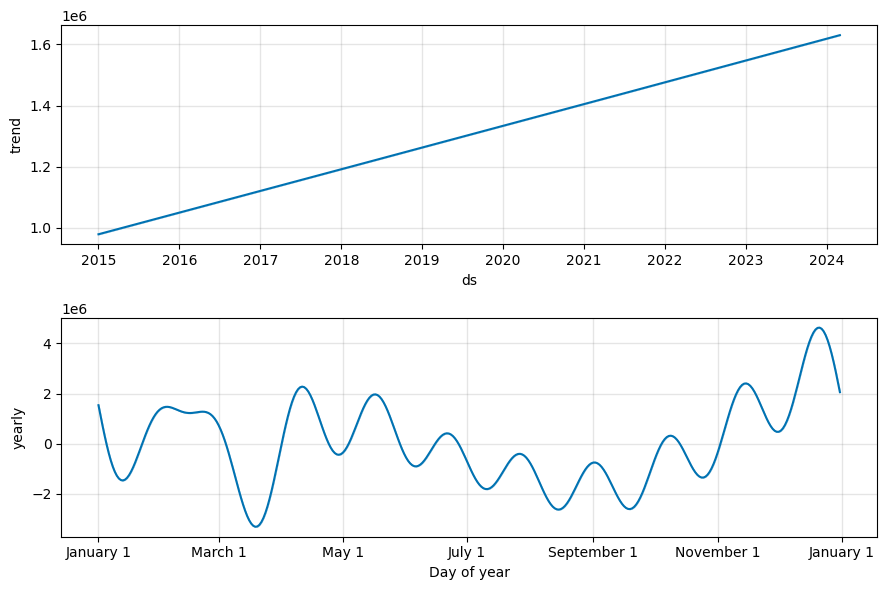

In [36]:
plot7 = m3.plot_components(forecast3 )